In [199]:
import shutil
import numpy as np
import os
import random
import json
import cv2
import matplotlib.pyplot as plt
import pickle

In [2]:
with open('./full-annotations.json') as json_file:
    data = json.load(json_file)

In [8]:
data[0].keys()

dict_keys(['id', 'annotations', 'file_upload', 'drafts', 'predictions', 'data', 'meta', 'created_at', 'updated_at', 'project'])

In [80]:
fn = '-'.join(data[10]['file_upload'].split('-')[1:])

In [81]:
ti = cv2.imread(f'./labeledcells/{fn}')

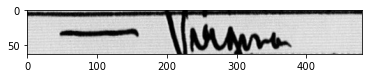

In [82]:
plt.imshow(ti)

In [116]:
data[0]['annotations'][0]['result'][11]['value'].keys()

dict_keys(['x', 'y', 'width', 'height', 'rotation', 'text'])

In [40]:
maxx = data[0]['annotations'][0]['result'][0]['value']['x']
minx = data[0]['annotations'][0]['result'][0]['value']['x']
maxy = data[0]['annotations'][0]['result'][0]['value']['y']
miny = data[0]['annotations'][0]['result'][0]['value']['y']
for anno in data[0]['annotations'][0]['result']:
    if anno['value']['x'] > maxx:
        maxx = anno['value']['x']
    if anno['value']['x'] < minx:
        minx = anno['value']['x']
    if anno['value']['y'] > maxy:
        maxy = anno['value']['y']
    if anno['value']['y'] < miny:
        miny = anno['value']['y']
        
maxx, minx, maxy, miny

(84.5075597516213, 14.250781102759246, 63.95187604576222, 1.025541530324211)

In [75]:
'text' in data[10]['annotations'][0]['result'][1]['value'].keys()


True

In [68]:
data[10]['annotations'][0]['result'][1]['value']

{'x': 10.833333333333334,
 'y': 11.11111111111111,
 'width': 71.25,
 'height': 88.88888888888889,
 'rotation': 0,
 'text': ['--- Virginia']}

In [69]:
w,h = data[10]['annotations'][0]['result'][1]['original_width'],data[10]['annotations'][0]['result'][1]['original_height']

In [72]:
int(w*data[10]['annotations'][0]['result'][1]['value']['x']/100)

52

In [76]:
int(w*data[10]['annotations'][0]['result'][1]['value']['width']/100 + 52)

394

In [78]:
int(h*data[10]['annotations'][0]['result'][1]['value']['y']/100)

7

In [83]:
int(h*data[10]['annotations'][0]['result'][1]['value']['height']/100 + 7)

63

In [97]:
data[10]['annotations'][0]['result'][1]

{'original_width': 480,
 'original_height': 63,
 'image_rotation': 0,
 'value': {'x': 10.833333333333334,
  'y': 11.11111111111111,
  'width': 71.25,
  'height': 88.88888888888889,
  'rotation': 0,
  'text': ['--- Virginia']},
 'id': 'qJOJMZEN9e',
 'from_name': 'transcription',
 'to_name': 'image',
 'type': 'textarea',
 'origin': 'manual'}

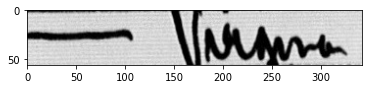

In [85]:
plt.imshow(ti[7:63,52:394,:])

https://labelstud.io/guide/predictions.html taken from <

In [122]:
data[0]['annotations'][0]['result'][12]

{'original_width': 3605,
 'original_height': 2791,
 'image_rotation': 0,
 'value': {'x': 71.21747502600138,
  'y': 1.1237304774017995,
  'width': 4.874892641699322,
  'height': 2.547122415444079,
  'rotation': 0},
 'id': 'C6KI3HeTlQ',
 'from_name': 'bbox',
 'to_name': 'image',
 'type': 'rectangle',
 'origin': 'manual'}

In [159]:
cv2.imread('bleheee')

In [171]:
def to_pixels(res,w,h):
    values = res['value']
    wmin = int(w*values['x']/100)
    wmax = int(wmin+w*values['width']/100)
    hmin = int(h*values['y']/100)
    hmax = int(hmin+w*values['height']/100)
    return wmin, wmax, hmin, hmax

In [187]:
def to_annotated_images(json, folder):
    wmaxx = 2
    hmaxx = 2
    imglist = []
    labelist = []
    for entry in json:
        jpg_name = '-'.join(entry['file_upload'].split('-')[1:])
        read_img = cv2.imread(folder+jpg_name)
        h,w=read_img.shape[:2]
        results = entry['annotations'][0]['result']
        if len(results)>0:
            for res in results:
                if 'text' in res['value'].keys():
                    wmin,wmax,hmin,hmax = to_pixels(res,w,h)
                    if (wmax-wmin)>wmaxx:
                        wmaxx = wmax-wmin
                    if (hmax-hmin)>hmaxx:
                        hmaxx = hmax-hmin

                    imglist.append(read_img[hmin:hmax,wmin:wmax,:])
                    labelist.append(res['value']['text'])
                           
    return labelist,imglist,wmaxx,hmaxx
                
                

In [188]:
lablist, imglist, wmax, hmax = to_annotated_images(data,'./labeledcells/')

In [198]:
wmax,hmax

(679, 480)

In [201]:
with open('./imgfile.pkl','wb') as re:
    pickle.dump(imglist,re)

In [202]:
with open('./labfile.pkl','wb') as ry:
    pickle.dump(lablist,ry)